<div style="text-align: center; background-color: #559cff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Lab 02 - Introduction To Data Science @ FIT-HCMUS, VNU-HCM 📌
</div>

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 4.0 - Data modelling
</div>

This section for bouns, you might need to use some basic Machine Learning algorithms to answer some questions that in cases of regression, and classification. In this scope of this subject, highly recommend you use `scikit-learn` (instead of implement once again these algorithms)

## Import

In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import pandas as pd
import numpy as np
import scipy.stats as stats

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

print("SEtup complete!")


SEtup complete!


## Data preparation

In [2]:
cleaned_df = pd.read_csv("../data/processed/21127166_africa_processed.csv")
cleaned_df.head()

,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Female Employment in Agriculture(%),Female Employment in Industry(%),...,Electric Power Consumption(kWH per capita),Renewable Energy Consumption (%),Fossil Fuel Consumption (%),Male life expectancy,Female life expectancy,"School enrollment, primary","School enrollment, tertiary",Primary completion rate,Year,Country
0,44903225.0,22040988.0,22862237.0,35.194972,10.552561,8.212828,13.74374,48.164092,49.723269,10.118534,...,712.608182,60.381415,41.345309,57.057657,60.885628,97.409735,10.196134,67.268794,2022,Algeria
1,44177969.0,21680725.0,22497244.0,21.524000,4.546000,10.000000,31.03555,10.323790,3.929019,23.940450,...,712.608182,60.381415,41.345309,74.879000,77.959000,97.409735,53.741741,67.268794,2021,Algeria
2,43451666.0,21318767.0,22132899.0,22.431000,5.398000,10.000000,30.49272,10.524500,3.867479,24.429170,...,712.608182,0.150000,41.345309,73.082000,75.912000,111.281151,52.498619,103.663528,2020,Algeria
3,42705368.0,20948465.0,21756903.0,23.298000,4.392000,10.000000,30.46512,9.940742,3.754027,23.812240,...,712.608182,0.160000,41.345309,75.238000,77.760000,108.845848,52.619942,101.364632,2019,Algeria
4,41927007.0,20564404.0,21362603.0,24.074000,4.482000,10.000000,30.68305,10.007310,3.807302,24.043400,...,712.608182,0.190000,41.345309,74.966000,77.205000,109.882820,51.365669,105.143959,2018,Algeria


In [3]:
df_copy = cleaned_df.drop(columns=['Country', 'Year'], axis=1)
X_full = df_copy.copy()

X_full.dropna(axis=0, subset=['Total Population'], inplace=True)
y = X_full['Total Population']
X_full.drop(['Total Population'], axis=1, inplace=True)

X_train_full, X_valid_full, y_train, y_valid = train_test_split(X_full, y, train_size=0.8, test_size=0.2, random_state=0)

category_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype == "object"]
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

X_train = X_train_full[category_cols + numerical_cols].copy()
X_valid = X_valid_full[category_cols + numerical_cols].copy()

In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(1142, 22)
(1142,)
(286, 22)
(286,)


## Feature engineering

In [5]:
def correlated_features(df, threshold):
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    drop_cols = [column for column in upper.columns if any(upper[column] > threshold)]
    return drop_cols

drop_cols = correlated_features(X_train, 0.8)
print(drop_cols)

['Male Population', 'Female Employment in Agriculture(%)', 'Female Employment in Industry(%)', 'Agriculture value added(in USD)', 'Male life expectancy', 'Female life expectancy ']


In [6]:
# Compute the correlation of 'Total Population' with other attributes
correlation = df_copy.corr()['Total Population']

# Display the attributes that have a high correlation with 'Total Population'
high_corr = correlation[correlation.abs() > 0.5]
high_corr_cols = high_corr.drop(['Total Population']).index.values.tolist()
print(high_corr_cols)

['Female Population', 'Male Population', 'GDP in USD', 'Net income from Abroad', 'Agriculture value added(in USD)']


In [7]:
# selected_cols = [col for col in high_corr_cols if col not in drop_cols]
selected_cols = high_corr_cols.copy()
selected_cols.remove('Female Population')
selected_cols.remove('Male Population')

print(selected_cols)

['GDP in USD', 'Net income from Abroad', 'Agriculture value added(in USD)']


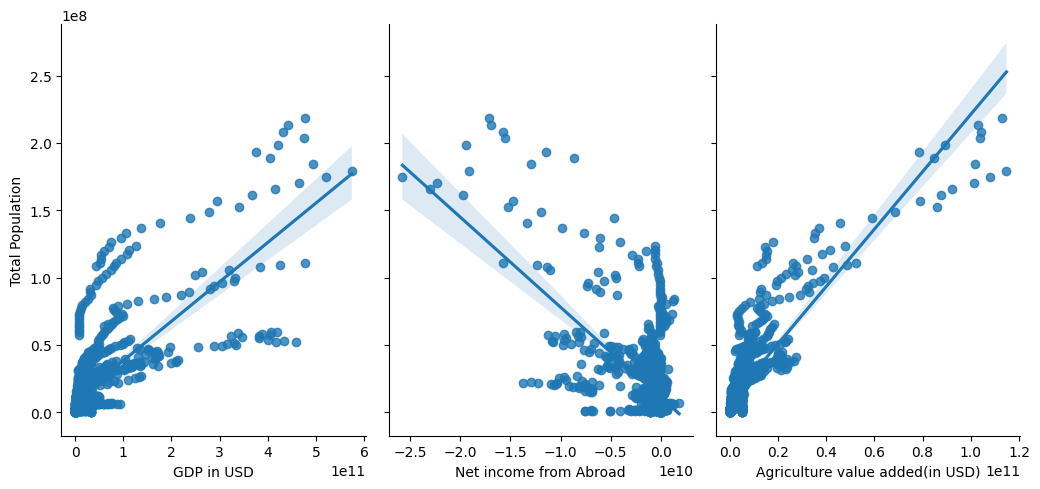

In [8]:
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_copy, y_vars=['Total Population'], x_vars=selected_cols, height=5, aspect=0.7, kind='reg')
plt.tight_layout()
plt.show()

In [9]:
X_train = X_train[selected_cols].copy()
X_valid = X_valid[selected_cols].copy()

print(X_train.shape)
print(X_valid.shape)

(1142, 3)
(286, 3)


In [10]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_valid_scaled = scaler.transform(y_valid.values.reshape(-1, 1))

## Training model

In [11]:
regr = LinearRegression()
regr.fit(X_train_scaled, y_train_scaled)


LinearRegression()

In [12]:
print('Intercept: ', regr.intercept_)
print('Coef: ', regr.coef_)

zip_cols = zip(selected_cols, regr.coef_)

Intercept:  [-0.09416601]
Coef:  [[0.23433785 0.13591495 1.02188033]]


## Evaluation

In [13]:
from sklearn.metrics import mean_absolute_error

def evaluation_statistics(y_valid, y_pred):
    mae = mean_absolute_error(y_valid, y_pred)
    mse = mean_squared_error(y_valid, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_valid, y_pred)
    return mae, mse, rmse, r2

In [14]:

y_pred = regr.predict(X_valid_scaled)
mae, mse, rmse, r2 = evaluation_statistics(y_valid_scaled, y_pred)

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R2 Score:', r2)

MAE: 0.04455311498282935
MSE: 0.005333139101936941
RMSE: 0.07302834451044979
R2 Score: 0.7953361466156157


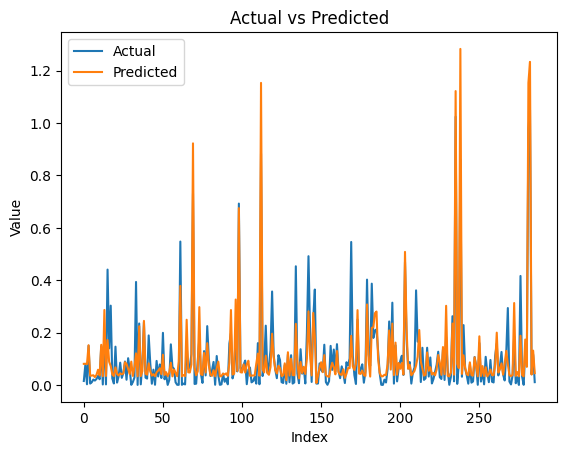

In [15]:
import numpy as np

# Flatten the arrays
y_valid_scaled_flat = y_valid_scaled.ravel()
y_pred_flat = y_pred.ravel()

# Create the line plots
sns.lineplot(x=np.arange(len(y_valid_scaled_flat)), y=y_valid_scaled_flat, label='Actual')
sns.lineplot(x=np.arange(len(y_pred_flat)), y=y_pred_flat, label='Predicted')

plt.title('Actual vs Predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()

plt.show()

In [16]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures()    
X_poly_train=pf.fit_transform(X_train_scaled) 
X_poly_valid=pf.transform(X_valid_scaled)

regr.fit(X_poly_train, y_train_scaled)
y_pred = regr.predict(X_poly_valid)

mae, mse, rmse, r2 = evaluation_statistics(y_valid_scaled, y_pred)

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R2 Score:', r2)


MAE: 0.038864679223302445
MSE: 0.003898225440946122
RMSE: 0.06243577052416445
R2 Score: 0.8504022068700005


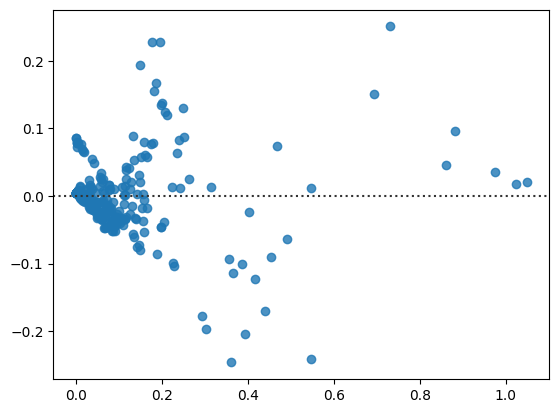

In [17]:
sns.residplot(x=y_valid_scaled, y=y_pred)
plt.show()

## Prediction

In [18]:
pf = PolynomialFeatures()    
X_poly_train=pf.fit_transform(X_train_scaled) 
X_poly_valid=pf.transform(X_valid_scaled)

regr = LinearRegression()
regr.fit(X_poly_train, y_train_scaled)
y_pred = regr.predict(X_poly_valid)


## Results analysis

In [19]:
result = pd.DataFrame({'Actual': y_valid_scaled.flatten(), 'Predicted': y_pred.flatten()})
result.head(10)

,Actual,Predicted
0,0.015041,0.093849
1,0.078940,0.091283
2,0.002546,0.093443
3,0.149614,0.162996
4,0.005163,0.022695
5,0.010150,0.020751
6,0.020514,0.022973
7,0.016651,0.019054
8,0.022780,0.024977
9,0.034763,0.055903


## Conclusion

The linear regression model was able to predict Total Populatioon (y) with a high degree of accuracy (R-squared = 0.85). The coefficients for all of the independent variables were statistically significant, indicating that they all have a significant impact on the target variable.

The most important factor for predicting the target variable is the independent variable 'Agriculture value added(in USD)' (coefficient = 1.02). This means that for every one unit increase in 'Agriculture value added(in USD)', there is a 1.02 unit increase in y.

The other independent variables ('GDP in USD', 'Net income from Abroad') also have a significant impact on the target variable, but their effects are smaller than the effect of 'Agriculture value added(in USD)'.

Overall, the linear regression model is a good fit for the data and can be used to accurately predict the target variable.